In [1]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [2]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [5]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [6]:
mdl03=mdl[mdl['Server Name']=='CALBIPRD03']

<B>CALPBPRD03 RAM<B>

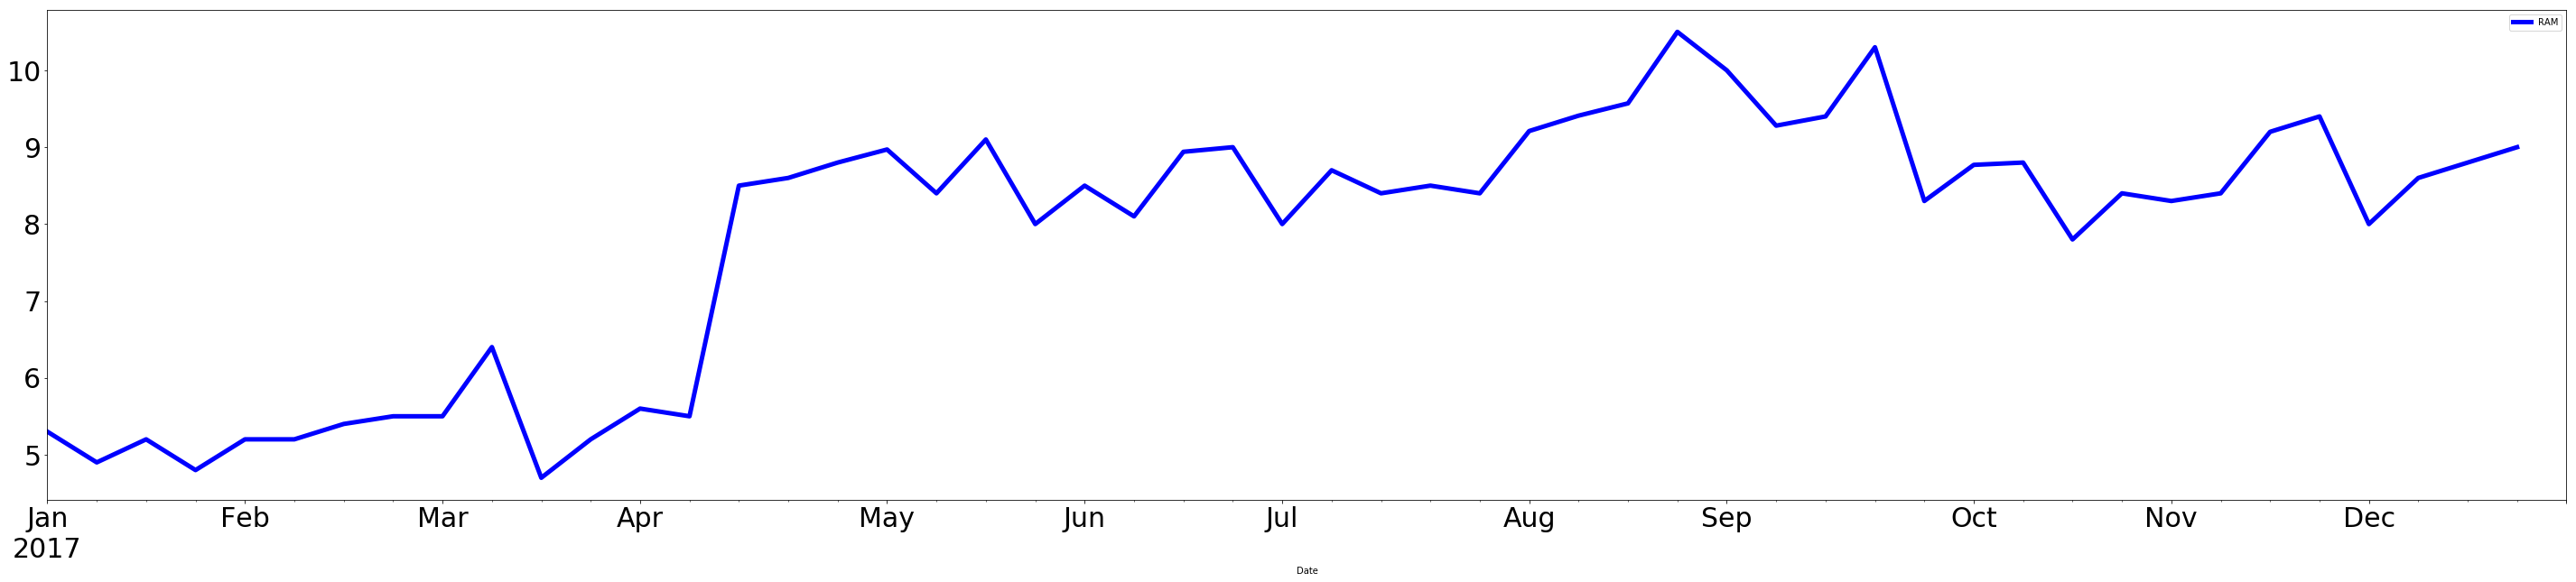

In [7]:
mdl03.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='RAM', color ='blue')

In [8]:
mdl03.set_index('Date', inplace=True)
mdl03['Month']= mdl03.index.month
mdl03['Day']=mdl03.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
mdl03.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD03,Wk 1,0.226,5.3,1,7
2017-01-14,CALBIPRD03,Wk 2,0.268,4.9,1,14
2017-01-21,CALBIPRD03,Wk 3,1.011,5.2,1,21
2017-01-28,CALBIPRD03,Wk 4,0.550,4.8,1,28
2017-02-04,CALBIPRD03,Wk 5,0.490,5.2,2,4


<B>CALBIPRD03 RAM (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


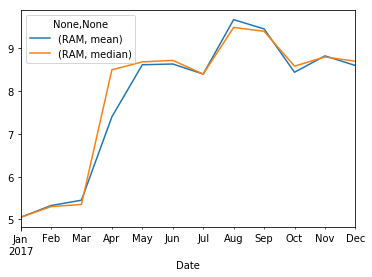

In [10]:
mdl03[['RAM']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for RAM - Week / Month Difference<b>

In [11]:
print 'CALBIPRD03 RAM Week Corr', mdl03['RAM'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD03 RAM Month Corr', mdl03['RAM'].resample('M').mean().autocorr(lag=1)

CALBIPRD03 RAM Week Corr 0.890275452249
CALBIPRD03 RAM Month Corr 0.866490999893


<b>Autocorrlation for RAM - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [32]:
print 'diff(!) lag =1 :', mdl03['RAM'].dropna().diff(1).dropna().autocorr(lag=1)
print 'diff(2) lag =1 :', mdl03['RAM'].dropna().diff(2).dropna().autocorr(lag=1)
print 'lag =1 :', mdl03['RAM'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl03['RAM'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl03['RAM'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl03['RAM'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl03['RAM'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl03['RAM'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl03['RAM'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl03['RAM'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl03['RAM'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl03['RAM'].dropna().autocorr(lag=34)

diff(!) lag =1 : -0.33695325092
diff(2) lag =1 : 0.262256101376
lag =1 : 0.890275452249
lag =2 : 0.850398863121
lag =3 : 0.803477093806
lag =4 : 0.711194137708
lag =5 : 0.681092638755
lag =6 : 0.623490387346
lag =7 : 0.601459211425
lag =12 : 0.362903278046
lag =24 : -0.381740022199
lag =24 : -0.149541456854


<b> CALBIPRD03 RAM Autocorrlation - Month Lag 1 to 11</b>

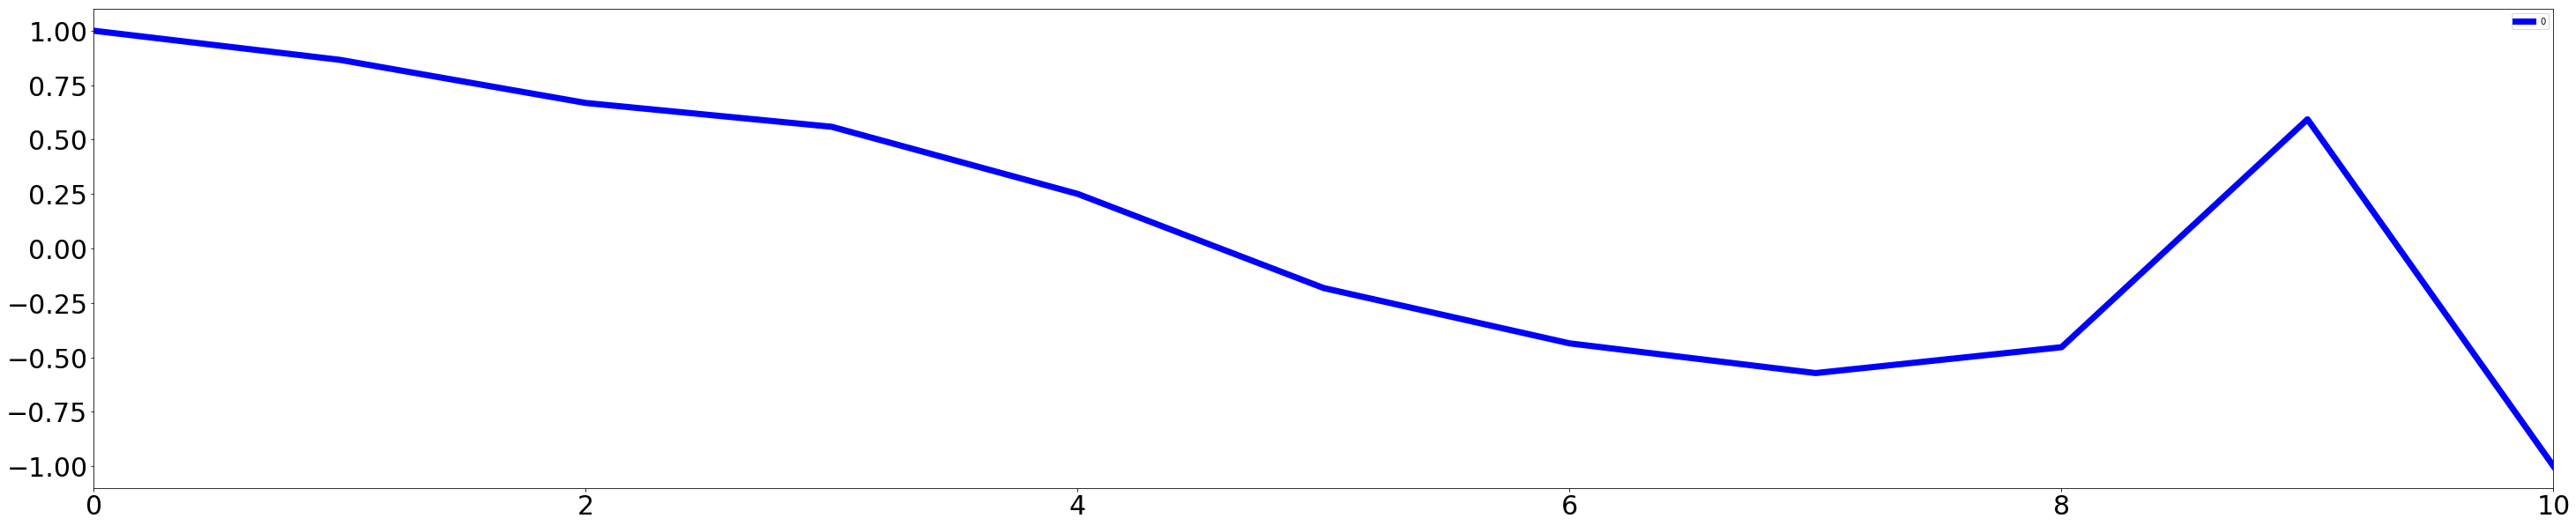

In [33]:
autoc = []

for i in range(11):
    autoc.append(mdl03['RAM'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

<b> CALBIPRD03 RAM Autocorrlation - Week Lag 1 to 51</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


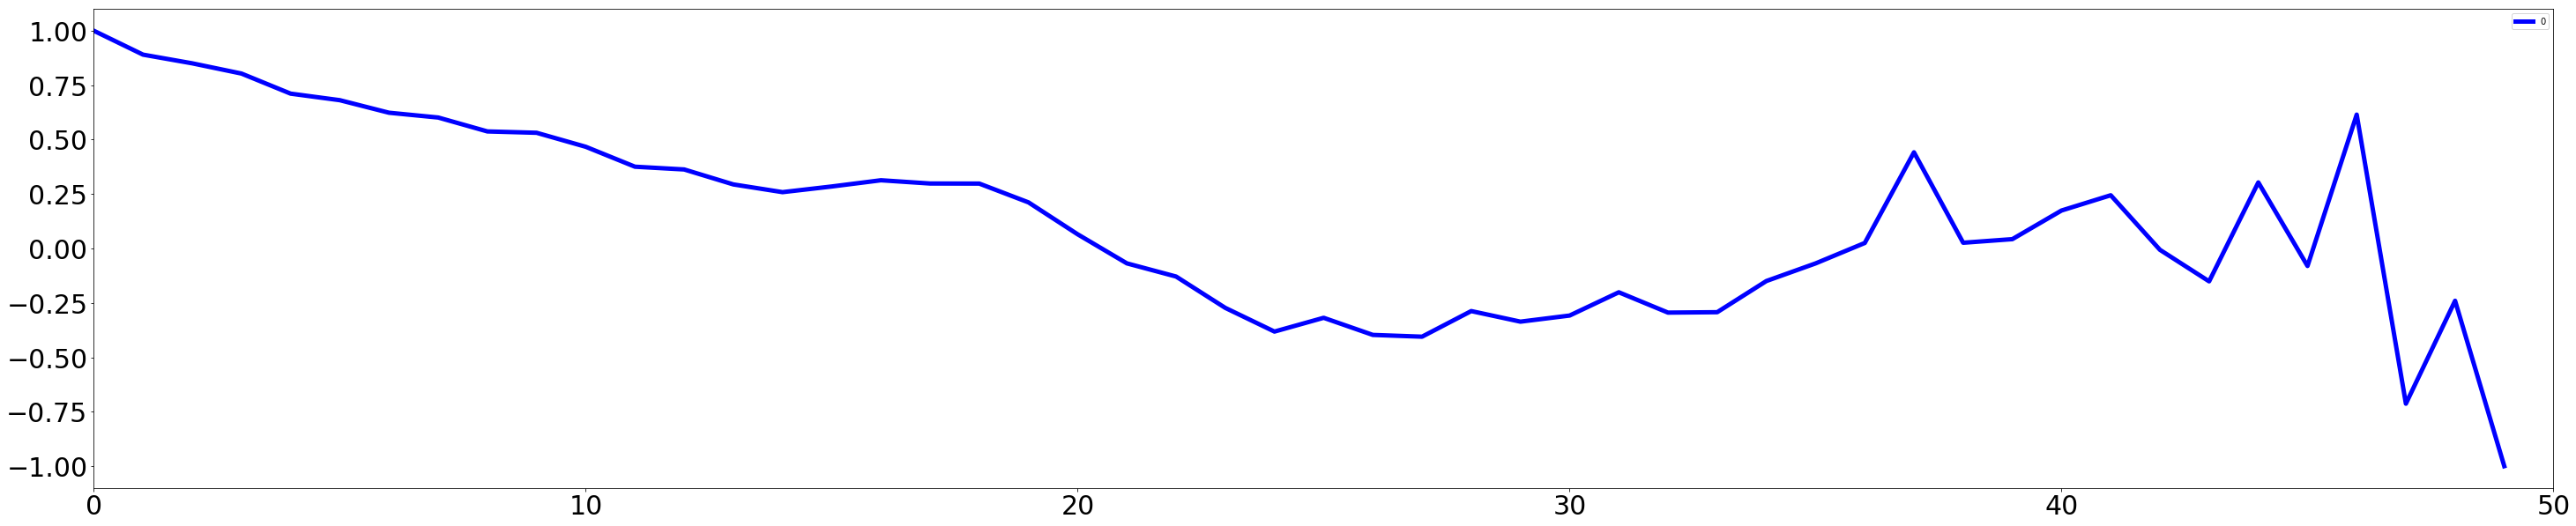

In [36]:
autoc = []

for i in range(51):
    autoc.append(mdl03['RAM'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


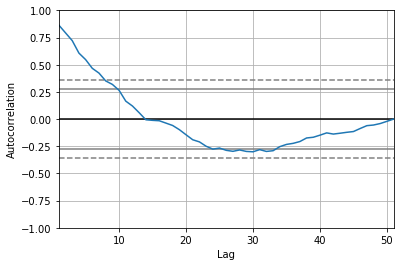

In [37]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl03['RAM'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

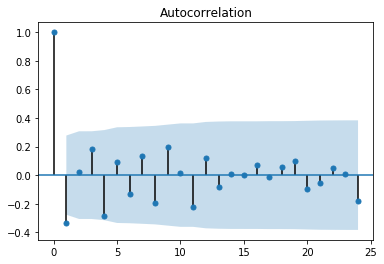

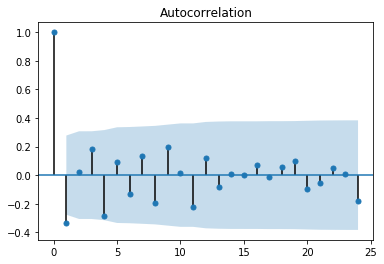

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
plot_acf(mdl03['RAM'].dropna().diff(1).dropna(),lags=24) 
#plot_acf(mdl03['RAM'].dropna(),lags=24) 

<b> Trend has been observed  as non-stationary, 'diff' of 1 used to make it stationary </b>
<br>Note:</br>
<br>Autocorrelation ~ 1 for lag 1, so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

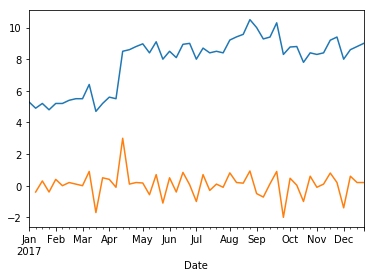

In [76]:
mdl03['RAM'].dropna().plot()
mdl03['RAM'].dropna().diff(1).dropna().plot()

In [49]:
from statsmodels.tsa.arima_model import ARMA

mdl03a = mdl03[['RAM']].dropna().diff(1).dropna().astype(float)
#mdl03a = mdl03[['RAM']].dropna().astype(float)
modela = ARMA(mdl03a, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 -55.347
Method:                       css-mle   S.D. of innovations              0.731
Date:                Sat, 06 Jan 2018   AIC                            116.695
Time:                        15:29:38   BIC                            122.431
Sample:                    01-14-2017   HQIC                           118.879
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0758      0.078      0.971      0.337      -0.077       0.229
ar.L1.RAM     -0.3317      0.132     -2.512      0.015      -0.591      -0.073
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.0149           +0.0000j            3.0149            0.5000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'RAM' coef is 0.8957 which is high and P <.05, so 'diff' 1 used to make it stationary and P value is < .05 which is significant.</br>
<br> 1. When diff =1 AR coef is -.3317 and autocorrelation at lag 1 with diff(1) is -0.33695325092 and P 0.015 <.05</br>
<br>2. When diff =2 AR coef is 0.2574 and autocorrelation at lag 1 with diff(2) is 0.262256101376 and P 0.066 >.05</br>
<br><b>Check: in AR diff =2 then coef is .4962 and P value is 0.000, Ask WHY</b></br>

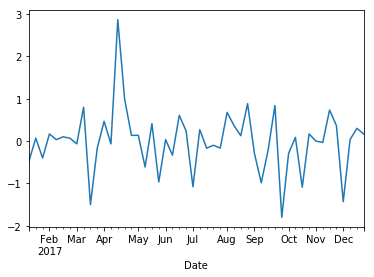

In [50]:
modela.resid.plot()

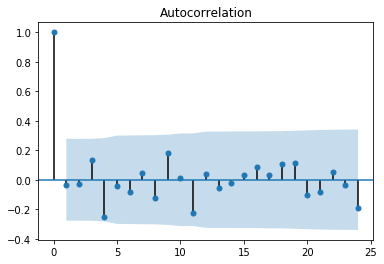

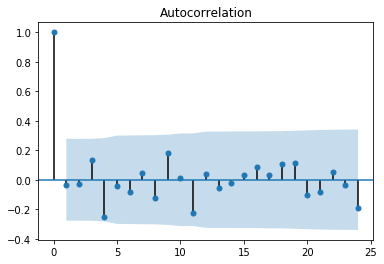

In [51]:
plot_acf(modela.resid, lags=24)

In [52]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [60]:
mdl03m = mdl03[['RAM']].dropna().diff(1).dropna().astype(float)
#mdl03m = mdl03[['RAM']].dropna().astype(float)
modelm = ARMA(mdl03m, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   50
Model:                     ARMA(0, 1)   Log Likelihood                 -55.330
Method:                       css-mle   S.D. of innovations              0.731
Date:                Sat, 06 Jan 2018   AIC                            116.659
Time:                        15:32:32   BIC                            122.395
Sample:                    01-14-2017   HQIC                           118.843
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0758      0.070      1.089      0.282      -0.061       0.212
ma.L1.RAM     -0.3332      0.128     -2.597      0.012      -0.585      -0.082
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.0012           +0.0000j            3.0012            0.0000
-----------------------------------------------------------------------------
"""

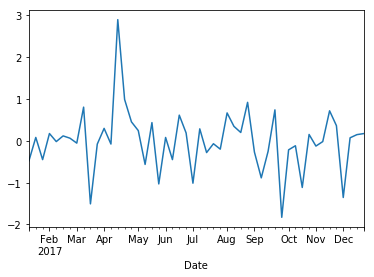

In [61]:
modelm.resid.plot()

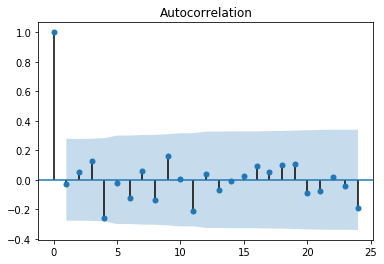

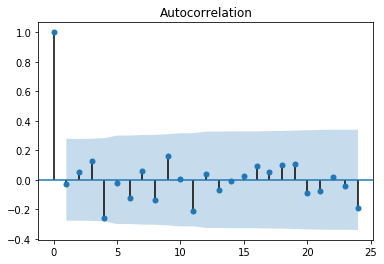

In [62]:
plot_acf(modelm.resid, lags=24)

<b>Ask ARMA(0,1) how to predict</b>

<b>ARIMA</b>

In [63]:
from statsmodels.tsa.arima_model import ARIMA
mdl03 = mdl03[['RAM']].dropna().astype(float)
model = ARIMA(mdl03, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.RAM   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -55.347
Method:                       css-mle   S.D. of innovations              0.731
Date:                Sat, 06 Jan 2018   AIC                            116.695
Time:                        15:33:38   BIC                            122.431
Sample:                    01-14-2017   HQIC                           118.879
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0758      0.078      0.971      0.337      -0.077       0.229
ar.L1.D.RAM    -0.3317      0.132     -2.512      0.015      -0.591      -0.073
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.0149           +0.0000j            3.0149            0.5000
-----------------------------------------------------------------------------
"""

In [68]:
mdl03['RAM'].dropna().diff(1).dropna().autocorr(1)
#mdl03['RAM'].dropna().autocorr(1)

-0.33695325091992578

<b>Note:</b>
<br>From ARIMA (1,1,0) coef is -.3317 and diff(1).autocorr(1) is -.3369 which is not same <b>what it indicates,</b> P value is 0.015 < .05 which is significate </br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


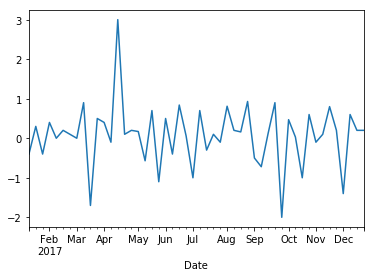

In [84]:
#model.resid.plot()
mdl03['RAM'].dropna().diff(1).dropna().plot()

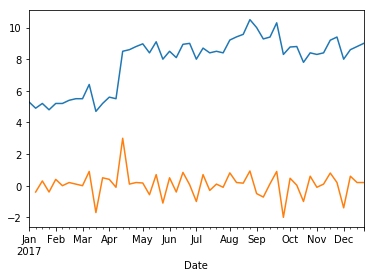

In [85]:
mdl03['RAM'].dropna().plot()
mdl03['RAM'].dropna().diff(1).dropna().plot()

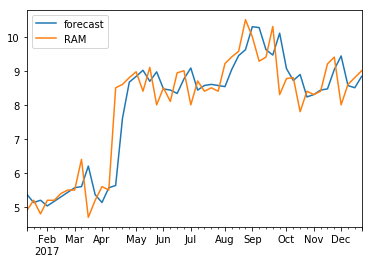

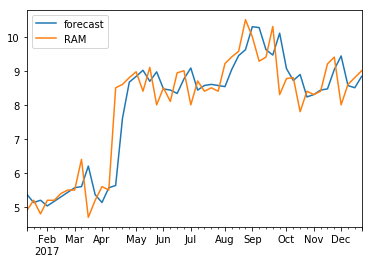

In [86]:
model.plot_predict(1, 50)

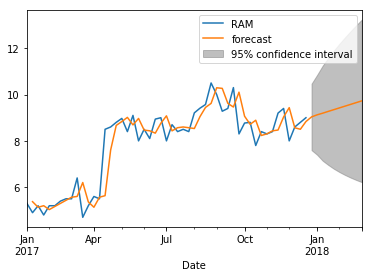

In [87]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl03['RAM'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Predit from AR(1) model</b>

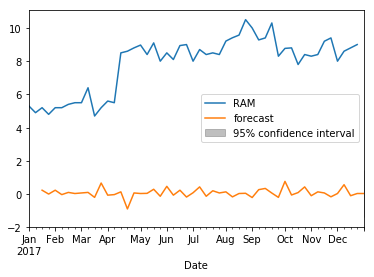

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl03['RAM'].dropna().plot(ax=ax)
fig = modela.plot_predict(1,50, ax=ax, plot_insample=False)